## Import the necessary libraries for the exercise.

In [10]:
pip install torch


     |████████████████████████████████| 59.9MB 201kB/s eta 0:00:01    |████▌                           | 8.3MB 410kB/s eta 0:02:06     |█████▋                          | 10.6MB 396kB/s eta 0:02:05     |██████████████▏                 | 26.5MB 522kB/s eta 0:01:04     |████████████████████▎           | 38.0MB 290kB/s eta 0:01:16
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install torchvision

     |████████████████████████████████| 583kB 345kB/s eta 0:00:01    |█▊                              | 30kB 299kB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import torch
from torch.nn import Parameter
from torch import nn
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torch.optim import SGD
from sklearn.metrics import accuracy_score

## Check the version of pytorch

In [18]:
torch.__version__

'1.2.0'

The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

LINK - https://pytorch.org/docs/stable/torchvision/index.html

Preprocessing of data such as conversion of the features into Tensors and Normalisation is done when we load the data. 

Transforms are common image transformations. They can be chained together using Compose.

Here we are applying two types of transforms to the images in the dataset.

1. Converting the images in to torch tensors
2. Normalising the images using mean and standard deviation

(x_normalized = x-mean / std

The values 0.1307 and 0.3081 represent the mean and standard deviation for MNIST dataset)

LINK - https://pytorch.org/docs/stable/torchvision/transforms.html

Dataset can we downloaded using the inbuilt function in pytorch 

LINK - https://pytorch.org/docs/stable/torchvision/datasets.html#mnist


In [19]:
pwd

'/Users/bhuvanaka/pytorch-tutorial'

In [20]:
#transforming the images to tensors and normalising
transforms = transforms.Compose(([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))

# mnist train_set
mnist_train = MNIST('./data',train=True,download=True,transform=transforms)

# mnist test_set
mnist_test = MNIST('./data',train=False,transform=transforms)

0it [00:00, ?it/s]

 99%|█████████▉| 9854976/9912422 [01:13<00:00, 11087316.05it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



0it [00:00, ?it/s]


  0%|          | 0/28881 [00:02<?, ?it/s]
32768it [00:02, 12115.34it/s]            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


9920512it [01:30, 11087316.05it/s]                             
 91%|█████████ | 1499136/1648877 [00:15<00:00, 6329730.67it/s]

0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




  0%|          | 0/4542 [00:00<?, ?it/s]

8192it [00:00, 9651.33it/s]             

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


# Creating a train test and validation set. 

Train Dataset:
The actual dataset that we use to train the model (weights and biases in the case of Neural Network). The model sees and learns from this data.

Validation Dataset:
The validation set is used to evaluate a given model, but this is for frequent evaluation. We as machine learning engineers use this data to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it “Learn” from this.

Test Dataset:
The Test dataset provides the gold standard used to evaluate the model. It is only used once a model is completely trained(using the train and validation sets). The test set is generally what is used to evaluate competing models.

We split the training dataset into Train and Validation dataset. Here we will split 90% of our training data into train dataset and 10% into validation dataset.

We would be using torch.utils.data.random_split function to randomly split the training data.

LINK - https://pytorch.org/docs/stable/data.html


In [21]:
train_len = int(0.9*mnist_train.__len__())
valid_len = mnist_train.__len__() - train_len
mnist_train, mnist_valid = torch.utils.data.random_split(mnist_train, lengths=[train_len, valid_len])

In [22]:
print(f"Size of : Training-set:\t\t{mnist_train.__len__()}") 
print(f"Size of : Validation-set:\t{mnist_valid.__len__()}") 
print(f"Size of : Test-set:\t\t{mnist_test.__len__()}")

Size of : Training-set:		54000
Size of : Validation-set:	6000
Size of : Test-set:		10000


In [23]:
# The images are stored in one-dimensional arrays of this length.
img_size_flat = 784 # 28 x 28

# Tuple with height and width of images used to reshape arrays.
img_shape = (28,28)

# Number of classes, one class for each of 10 digits.
num_classes = 10

# Helper-function for plotting images

Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [24]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

# Plot a few images to see if data is correct

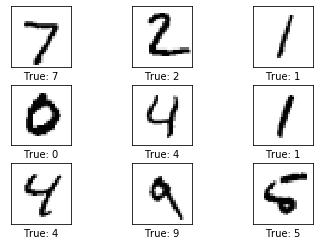

In [25]:
# Get the first images from the test-set.
images = mnist_test.data[0:9]

# Get the true classes for those images.
cls_true = mnist_test.targets[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

# PyTorch
PyTorch is a Python package that provides two high-level features:

1. Tensor computation (like NumPy) with strong GPU acceleration
2. Deep neural networks built on a tape-based autograd system

You can reuse your favorite Python packages such as NumPy, SciPy and Cython to extend PyTorch when needed.

## More about PyTorch

At a granular level, PyTorch is a library that consists of the following components:

| Component | Description |
| ---- | --- |
| **torch** | a Tensor library like NumPy, with strong GPU support |
| **torch.autograd** | a tape-based automatic differentiation library that supports all differentiable Tensor operations in torch |
| **torch.nn** | a neural networks library deeply integrated with autograd designed for maximum flexibility |
| **torch.multiprocessing** | Python multiprocessing, but with magical memory sharing of torch Tensors across processes. Useful for data loading and Hogwild training |
| **torch.utils** | DataLoader, Trainer and other utility functions for convenience |
| **torch.legacy(.nn/.optim)** | legacy code that has been ported over from torch for backward compatibility reasons |

Usually one uses PyTorch either as:

- a replacement for NumPy to use the power of GPUs.
- a deep learning research platform that provides maximum flexibility and speed

### Dynamic Neural Networks: Tape-Based Autograd

PyTorch has a unique way of building neural networks: using and replaying a tape recorder.

Most frameworks such as TensorFlow, Theano, Caffe and CNTK have a static view of the world.
One has to build a neural network, and reuse the same structure again and again.
Changing the way the network behaves means that one has to start from scratch.

With PyTorch, we use a technique called reverse-mode auto-differentiation, which allows you to
change the way your network behaves arbitrarily with zero lag or overhead. Our inspiration comes
from several research papers on this topic, as well as current and past work such as
[torch-autograd](https://github.com/twitter/torch-autograd),
[autograd](https://github.com/HIPS/autograd),
[Chainer](http://chainer.org), etc.

While this technique is not unique to PyTorch, it's one of the fastest implementations of it to date.
You get the best of speed and flexibility for your crazy research.

# Recommended Reading
https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

# Neural Network

Neural networks can be constructed using the torch.nn package.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:    
`weight = weight - learning_rate * gradient`

# Model

We will define networks as a subclass of nn.Module

You just have to define the forward function, and the backward function (where gradients are computed) is automatically defined for you using autograd. You can use any of the Tensor operations in the forward function.

The network we will be defining here will contain a `single Linear Layer`.

The linear layer contains 2 variables `weights` and `bias`, which is changed by PyTorch so as to make the model perform better on the training data.

This simple mathematical model multiplies the images variable x with the weights and then adds the biases.

The result is a matrix of shape [num_images, num_classes] because x has shape [num_images, img_size_flat] and weights has shape [img_size_flat, num_classes], so the multiplication of those two matrices is a matrix with shape [num_images, num_classes] and then the biases vector is added to each row of that matrix.


### __init__( ) function
1. The first variable that must be optimized is called weights and is defined here as a Pytorch variable that must be initialized with zeros and whose shape is `[img_size_flat, num_classes]`, so it is a 2-dimensional tensor (or matrix) with img_size_flat rows and num_classes columns.
2. The second variable that must be optimized is called biases and is defined as a 1-dimensional tensor (or vector) of length num_classes.
3. Here in the __init__() function both weight and bias Tensors wrapped in as `Parameter`.Parameters are `Tensor` subclasses, that have a very special property when used with Module s - when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear e.g. in `parameters()` iterator.

### forward( ) function
1. The forward function will take input of shape `[num_images, img_size_flat]` and multiplies `weight` of shape `[num_images, num_classes]` and the `bias`  is added to final result. We can use torch built in func call `torch.addmm()` for performing the above operation.It is similar to `tf.nn.xw_plus_b` in `Tensorflow`
2. The `out` in first line of `forward()` will have the shape `[num_images, num_classes]`
3. However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each row of the `out` matrix sums to one, and each element is limited between zero and one. This is calculated using the so-called softmax function and the result is stored in `out` it self.

```N.B The module `softmax` doesn’t work directly with NLLLoss, which expects the Log to be computed between the Softmax and itself. we will be Using LogSoftmax instead (it’s faster and has better numerical properties).```

Softmax takes input matrix and `dim`, A dimension along which Softmax will be computed (so every slice along dim will sum to 1)

If you are using softmax in forward function, the you should use Cross Entropy loss for the loss. 
LINK - https://pytorch.org/docs/stable/torch.html#torch.addmm

### get_weights( )
1. This function is used to get the weights of the Network. This could be plotted to understand what the model actually has learned



In [26]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.weight = Parameter(torch.zeros((784, 10),dtype=torch.float32,requires_grad=True))
        self.bias = Parameter(torch.zeros((10),dtype=torch.float32,requires_grad=True))
        
    def get_weights(self):
        return self.weight
    
    def forward(self,x):
        out = torch.addmm(self.bias, x, self.weight)
        out = F.log_softmax(out,dim=1)
        return out

# Training Network

Function to train the Network

Input:

model : model object

device : cpu or cuda

train_loader : Data loader. Combines a dataset and a sampler, and provides single or multi-process iterators over the dataset


optimizer : the function we are going to use for adjusting model parameters

### Step by step


1. `model.train()`: tells your model that you are training the model. So effectively layers like dropout, batchnorm etc. which behave different on the train and test procedures know what is going on and hence can behave accordingly.
2. `for loop` : it will iterate through train_loader and will give you 2 outputs `data` and `target`. The size of `data` and `target` will depend on the `batch_size` that you have provided while creating the `DataLoader` function for `train dataset` . `data` shape `[batch_size,row,columns]`,`target` shape `[batch_size]` 
3. Here`data` will be of shape `[batch_size,row,columns]` ,we will convert `data` into `[batch_size,row x columns]`  (Flattening the images to fit into Linear layer)
4. Moving the the `data` and `target` to devices based on our choice and machine specification. 
5. By calling `optimizer.zero_grad` we will set Gradient buffers to zero. Else the gradients will get  accumulated to existing gradients.
6. Input the `data` to `model` and get outputs, The output will be of shape `[batch_size,num_classes]`
7. `Loss function` : A loss function takes the (output, target) pair of inputs, and computes a value that estimates how far away the output is from the target . We will be using the negative log likelihood loss. It is useful to train a classification problem with C classes.
`nll_loss` : calculates the difference between the `output` to `target` , `output` of shape `[batch_size,num_classes]` and `target` of shape `[batch_size]`  where each value is `0 ≤ targets[i] ≤ num_classes−1`

NOTE :
MultiClass Classification : We can use have a log softmax layer in the forward function and use NLL_loss. Alternatively you can use Cross Entropy Loss for multi class classification. It has both nn.LogSoftmax() and nn.NLLLoss() in one single class.So you do not need a log softmax layer in your forward function. Code with Cross Entropy loss is available at the end of this notebook.

Binary Classification: If you have a binary classification problem, You can use a sigmoide layer in your forward function and use BCELOss (Binary Cross Entropy loss) . Alrenatively you can use BCEWithLogitsLoss. This loss combines a `Sigmoid` layer and the `BCELoss` in one single class. So you do not need a sigmoid layer in your forward function. 

8. when we call `loss.backward()`, the whole graph is differentiated w.r.t. the loss, and all Tensors in the graph that has `requires_grad=True` will have their `.grad` Tensor accumulated with the gradient.
9. To backpropagate the error all we have to do is to `loss.backward()`
10. `optimizer.step()` : performs a parameter update based on the current gradient (stored in .grad attribute of a parameter) and the update rule.

LINK : https://pytorch.org/docs/stable/nn.html?highlight=model%20train
       https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
       https://pytorch.org/docs/stable/autograd.html
       https://pytorch.org/docs/stable/optim.html

In [27]:
def train(model,device,train_loader,optimizer):
    model.train()
    correct = 0
    #y_true = [] # uncomment these lines if u want to use sklearn's metrics 
    #y_pred = [] # uncomment these lines if u want to use sklearn's metrics 
    for data,target in train_loader:
         # we have a 28 X 28 image. we are flattening it to 
        data = torch.reshape(data,(-1,784))
        data, target = data.to(device), target.to(device)
        #set the gradient values to zero at the start of training.
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1)
        correct += pred.eq(target).sum().item() #comment these lines if u want to calculate accuracy without sklearn.
        #y_pred.extend(pred.reshape(-1).tolist()) # uncomment these lines if u want to use sklearn's metrics 
        #y_true.extend(target.reshape(-1).tolist()) # uncomment these lines if u want to use sklearn's metrics 
    #print("Accuracy is" , accuracy_score(y_true,y_pred)) # uncomment these lines if u want to use sklearn's metrics 
    print('Training set Accuracy: {}/{} ({:.0f}%)\n'.format(correct, len(train_loader.dataset),100. * correct / len(train_loader.dataset))) #comment these lines if u want to calculate accuracy without sklearn.

Function to test the Network
- Input:
    - model : model object
    
    - device : `cpu` or `cuda`
    
    - test_loader : Data loader. Combines a dataset and a sampler, and provides single or multi-process iterators over the                    dataset.

### Step by step

1. `model.eval()` : tells your model that you are testing the model.So the Regularization Layers like `Dropout` and `BatchNormalization` get disabled. 
2. The wrapper `with torch.no_grad()` temporarily sets all the requires_grad flag to false. Because we don't need to compute gradients while are getting our inference from the network.This will reduce memory usage and speed up computations.
3. The next three line are the same as train function
4. we will calculate the test_loss across the complete dataset
5. we will also calculate the `accuracy` of model by comparing with target

In [28]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    #y_true = [] # uncomment these lines if u want to use sklearn's metrics 
    #y_pred = [] # uncomment these lines if u want to use sklearn's metrics 
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = torch.reshape(data,(-1,784))
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1) # get the index of the max log-probability
            correct += pred.eq(target).sum().item()
            
            # this is to flatten the tensor, convert to a list and extend it for all the batches
            #y_pred.extend(pred.reshape(-1).tolist()) # uncomment these lines if u want to use sklearn's metrics 
            #y_true.extend(target.reshape(-1).tolist()) # uncomment these lines if u want to use sklearn's metrics 
    #print("Accuracy is" , accuracy_score(y_true,y_pred)) # uncomment these lines if u want to use sklearn's metrics 
           
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset),
        (100. * correct / len(test_loader.dataset))))

### Checking Device Availabilty 

In [29]:
device = "cuda" if torch.cuda.is_available() else "cpu"

## DataLoader function for Training Set and Test Set:
Data loader combines a dataset and a sampler, and provides single or multi-process iterators over the dataset.

In [30]:

kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}
train_loader = DataLoader(mnist_train,batch_size=64,shuffle=True,**kwargs)
test_loader = DataLoader(mnist_test,batch_size=1024,shuffle=False,**kwargs)

# Model

Model object is created and Transferred to `device` according to the availabilty of `GPU` 

In [31]:
model = LinearModel().to(device)

## Optimizer

We will be using `stochastic gradient descent|(SGD)` optimizer

`SGD` takes `model parameters` the we want to optimze and a learning_rate `lr` in which the model parametrs get updated

In [32]:
optimizer = SGD(model.parameters(),lr=0.5)

Model parameters contain the weights and biases that we defined inside our model , So while training the weight and bias will get updated.


In [33]:
list(model.parameters())

[Parameter containing:
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], requires_grad=True),
 Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)]

## Training

Number of `epoch` is 10 .So in training the model will get iterated through the complete Training set 10 times .

After each epoch we will run `test` and check how well the model is performing on unseen data.

If the Training Accuracy is going Up and Testing Accuracy is going down we can say that model is overfitting on the train set. 

There are Techinques like `EarlyStopping` and usage of validation datset that we will discuss later.

In [34]:
epochs = 5
for epoch in range(epochs):
        train(model,device,train_loader,optimizer)
        test(model,device,test_loader)

Training set Accuracy: 46011/54000 (85%)


Test set: Average loss: 0.9115, Accuracy: 8803/10000 (88%)




1654784it [00:33, 6329730.67it/s]                             

Training set Accuracy: 47239/54000 (87%)


Test set: Average loss: 1.4293, Accuracy: 8205/10000 (82%)

Training set Accuracy: 47481/54000 (88%)


Test set: Average loss: 0.8409, Accuracy: 8910/10000 (89%)

Training set Accuracy: 47826/54000 (89%)


Test set: Average loss: 0.8153, Accuracy: 8917/10000 (89%)

Training set Accuracy: 47884/54000 (89%)


Test set: Average loss: 1.1572, Accuracy: 8517/10000 (85%)



## CODE with Cross Entropy Loss :


In [35]:
device = "cuda" if torch.cuda.is_available() else "cpu"
kwargs = {'num_workers': 1, 'pin_memory': True} if device=='cuda' else {}
train_loader = DataLoader(mnist_train,batch_size=64,shuffle=True,**kwargs)
test_loader = DataLoader(mnist_test,batch_size=1024,shuffle=False,**kwargs)

In [36]:
model = LinearModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(),lr=0.5)

In [37]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.weight = Parameter(torch.zeros((784, 10),dtype=torch.float32,requires_grad=True))
        self.bias = Parameter(torch.zeros((10),dtype=torch.float32,requires_grad=True))
        
    def get_weights(self):
        return self.weight
    
    def forward(self,x):
        out = torch.addmm(self.bias, x, self.weight)
        return out

In [38]:
def train(model,device,train_loader,optimizer):
    model.train()
    correct = 0
    y_true = []
    y_pred = []
    for data,target in train_loader:
        data = torch.reshape(data,(-1,784))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        # Cross entropy loss combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
        # So we need not have a logsoftmax layer in our forward function.   
        loss = criterion(output, target) 
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1)
        y_pred.extend(pred.reshape(-1).tolist())
        y_true.extend(target.reshape(-1).tolist())
    print("Accuracy on training set is" , accuracy_score(y_true,y_pred))

In [39]:
def test(model, device, test_loader):
    model.eval()
    correct = 0
    y_true = []
    y_pred = []
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            data = torch.reshape(data,(-1,784))
            output = model(data)
            pred = output.argmax(dim=1) # get the index of the max log-probability
            y_true.extend(target.reshape(-1).tolist()) 
            y_pred.extend(pred.reshape(-1).tolist())
    print("Accuracy on test set is" , accuracy_score(y_true,y_pred))

In [40]:
epochs = 5
for epoch in range(epochs):
        train(model,device,train_loader,optimizer)
        test(model,device,test_loader)

Accuracy on training set is 0.8517962962962963
Accuracy on test set is 0.8665
Accuracy on training set is 0.8758888888888889
Accuracy on test set is 0.8981
Accuracy on training set is 0.8800370370370371
Accuracy on test set is 0.8916
Accuracy on training set is 0.8829444444444444
Accuracy on test set is 0.8872
Accuracy on training set is 0.8848703703703704
Accuracy on test set is 0.8762
